## Importing libraries

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
import warnings
import os
%matplotlib inline
warnings.filterwarnings("ignore")

## Loading and checking the data set

In [30]:
# Loading the dataset to a Pandas DataFrame
customer_data = pd.read_csv("Mall_Customers.csv")

# Print First 5 rows of our DataFrame
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA (Exploratory Data Analysis)

### Data exploration 

In [31]:
customer_data.shape

(200, 5)

In [32]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [33]:
#rename columns
customer_data.rename(columns={'Annual Income (k$)': "Annual_Income", "Spending Score (1-100)": "Spending_Score"}, inplace=True)

In [34]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


1. Missing values

In [35]:
# check for missing values
customer_data.isnull().sum()

CustomerID 0
Gender 0
Age 0
Annual_Income 0
Spending_Score 0
dtype: int64

2. Categorical variable

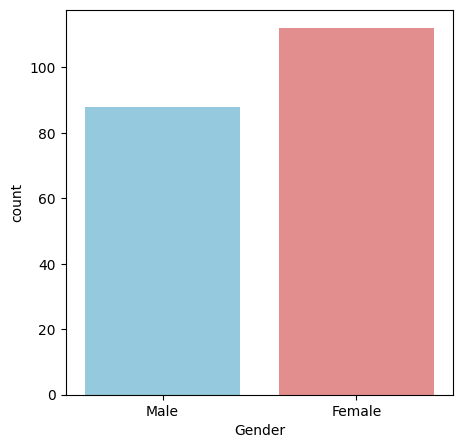

In [36]:
# Categorical variable
plt.figure(figsize=(5, 5))
sns.countplot(x="Gender", data=customer_data, palette=['skyblue', 'lightcoral'])
plt.show()

3. Numerical variable

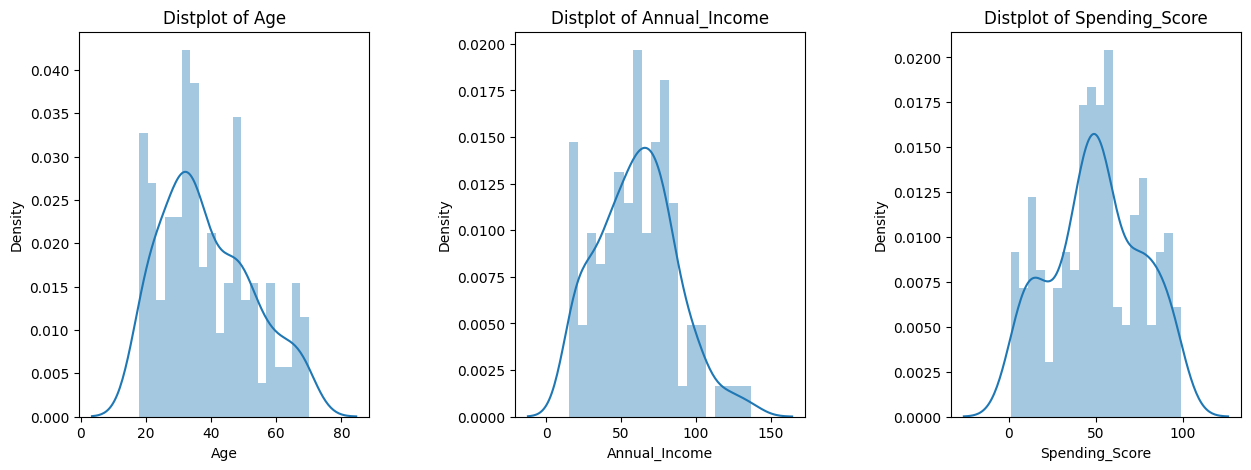

In [37]:
# Numerical variable
plt.figure(1 , figsize = (15 , 5))
n = 0 
for x in ['Age' , 'Annual_Income' , 'Spending_Score']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace =0.5) #space between graph
    sns.distplot(customer_data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

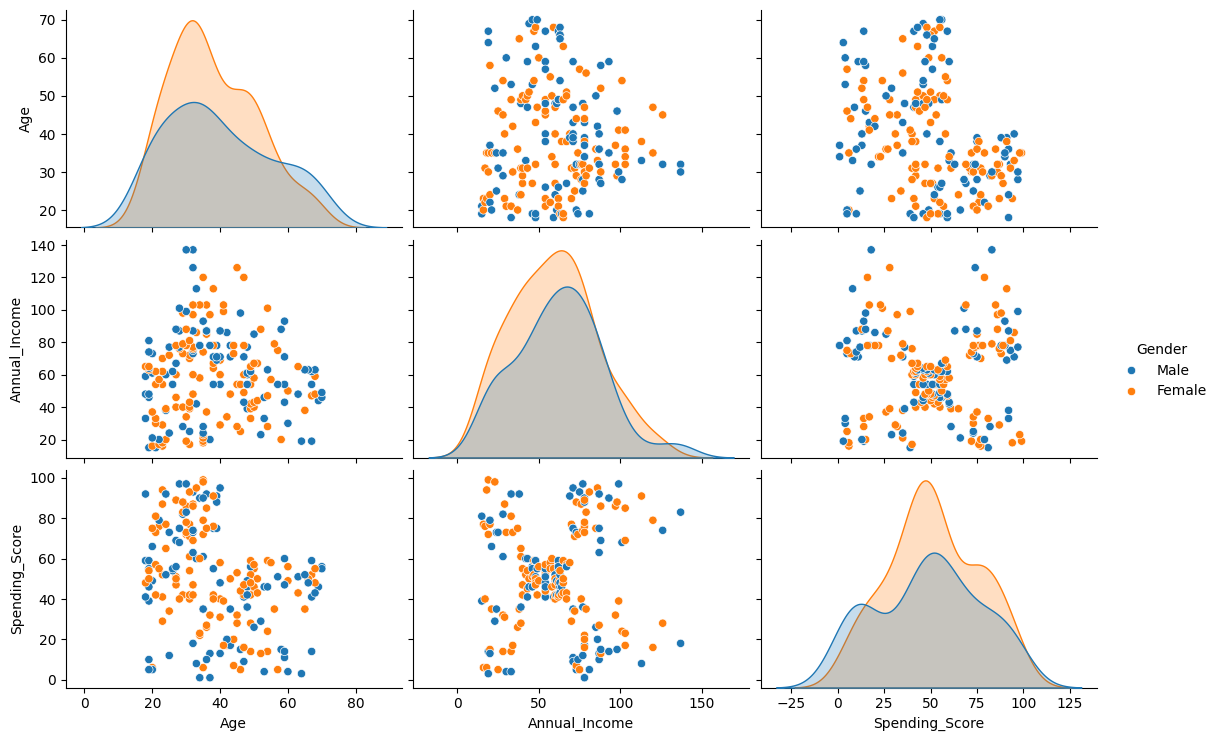

In [38]:
sns.pairplot(customer_data[['Age' , 'Annual_Income' , 'Spending_Score', 'Gender']], hue='Gender', aspect=1.5)
plt.show()

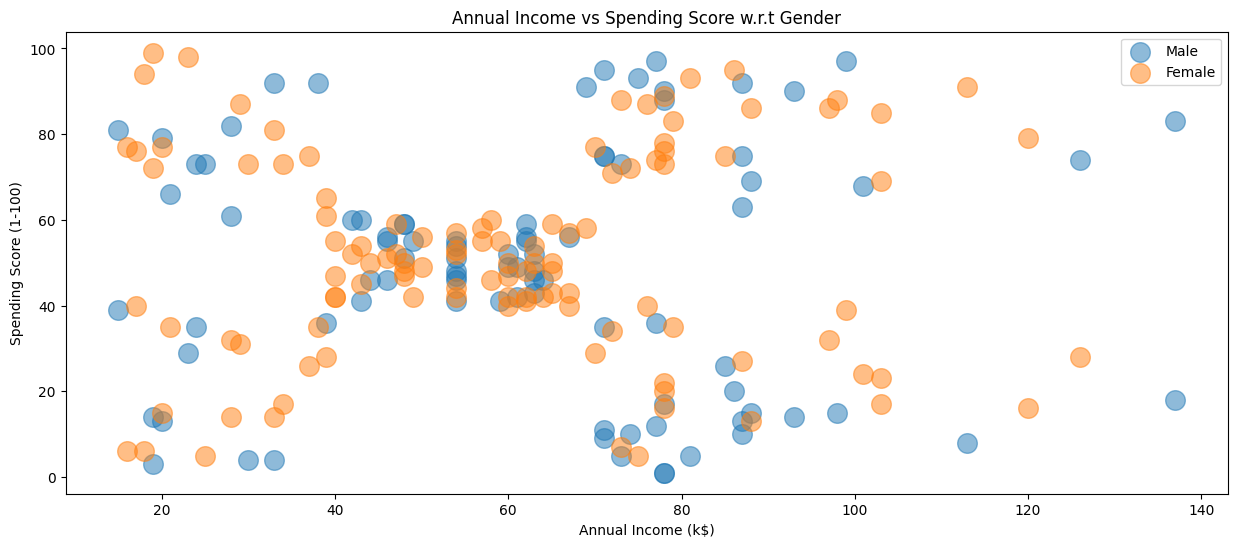

In [39]:
plt.figure(figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual_Income',y = 'Spending_Score' ,
                data = customer_data[customer_data['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

4. Other Exploration

<Axes: >

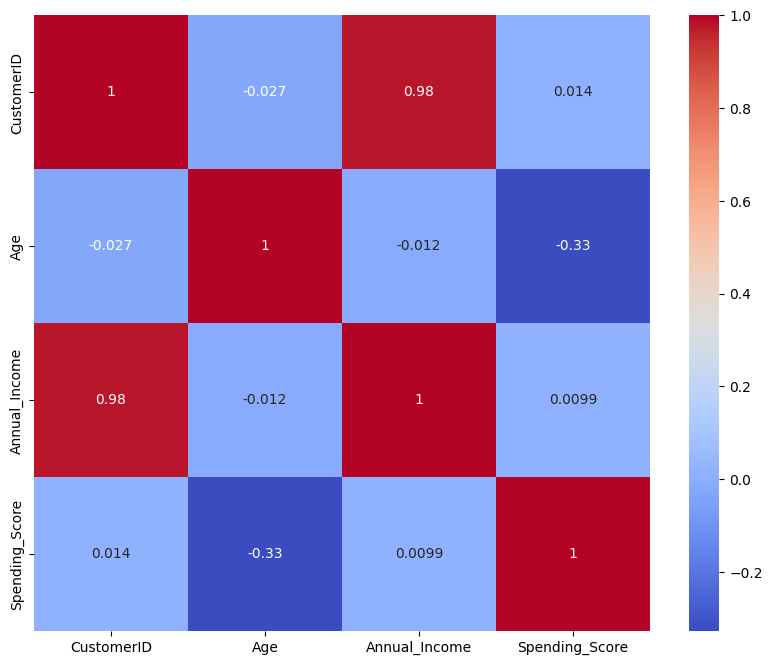

In [40]:
corr = customer_data.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(data=corr, cbar=True, square=True, annot=True, cmap='coolwarm')

### Train Model

Segmentation using Annual Income and Spending Score

In [41]:
x = customer_data[['Annual_Income', 'Spending_Score']].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

find the number of clusters to optimum WCSS.

WCSS = Within Clusters Sum Square

In [42]:
# finding wcss value for different number of clusters
wcss = []

for i in range(1 , 11):
    kmeans = (KMeans(n_clusters = i ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 42  , algorithm='elkan') )
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

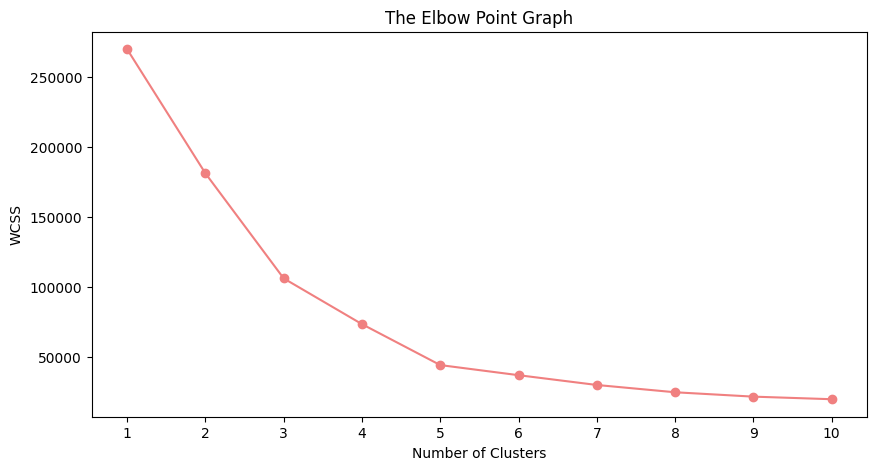

In [43]:
# plot an elbow graph
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss, color='lightcoral', marker='o')
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks(np.arange(1,11,1))
plt.show()

Optimum Number of Clusters = 5 

In [44]:
kmeans = KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 0  , algorithm='elkan') 

# return a label for each data point base on their cluster
y = kmeans.fit_predict(x)
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


Visualizing all the Clusters

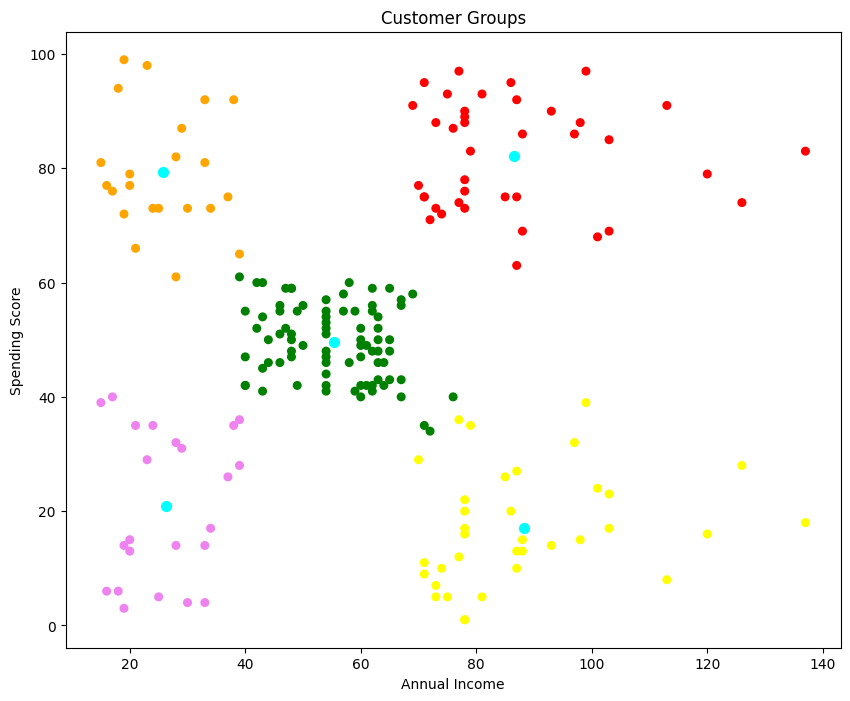

In [45]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(10,8))
colors = ['green', 'red', 'yellow', 'violet', 'orange']
cmap = ListedColormap(colors)
plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap=cmap)
# plot the centroids
plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], s=50, c='cyan')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Segmentation using Age and Spending Score

In [46]:
x2 = customer_data[['Age','Spending_Score']].values
print(x2)

[[19 39]
 [21 81]
 [20  6]
 [23 77]
 [31 40]
 [22 76]
 [35  6]
 [23 94]
 [64  3]
 [30 72]
 [67 14]
 [35 99]
 [58 15]
 [24 77]
 [37 13]
 [22 79]
 [35 35]
 [20 66]
 [52 29]
 [35 98]
 [35 35]
 [25 73]
 [46  5]
 [31 73]
 [54 14]
 [29 82]
 [45 32]
 [35 61]
 [40 31]
 [23 87]
 [60  4]
 [21 73]
 [53  4]
 [18 92]
 [49 14]
 [21 81]
 [42 17]
 [30 73]
 [36 26]
 [20 75]
 [65 35]
 [24 92]
 [48 36]
 [31 61]
 [49 28]
 [24 65]
 [50 55]
 [27 47]
 [29 42]
 [31 42]
 [49 52]
 [33 60]
 [31 54]
 [59 60]
 [50 45]
 [47 41]
 [51 50]
 [69 46]
 [27 51]
 [53 46]
 [70 56]
 [19 55]
 [67 52]
 [54 59]
 [63 51]
 [18 59]
 [43 50]
 [68 48]
 [19 59]
 [32 47]
 [70 55]
 [47 42]
 [60 49]
 [60 56]
 [59 47]
 [26 54]
 [45 53]
 [40 48]
 [23 52]
 [49 42]
 [57 51]
 [38 55]
 [67 41]
 [46 44]
 [21 57]
 [48 46]
 [55 58]
 [22 55]
 [34 60]
 [50 46]
 [68 55]
 [18 41]
 [48 49]
 [40 40]
 [32 42]
 [24 52]
 [47 47]
 [27 50]
 [48 42]
 [20 49]
 [23 41]
 [49 48]
 [67 59]
 [26 55]
 [49 56]
 [21 42]
 [66 50]
 [54 46]
 [68 43]
 [66 48]
 [65 52]
 

In [47]:
# finding wcss value for different number of clusters
wcss = []

for i in range(1 , 11):
    kmeans = (KMeans(n_clusters = i ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 42  , algorithm='elkan') )
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)

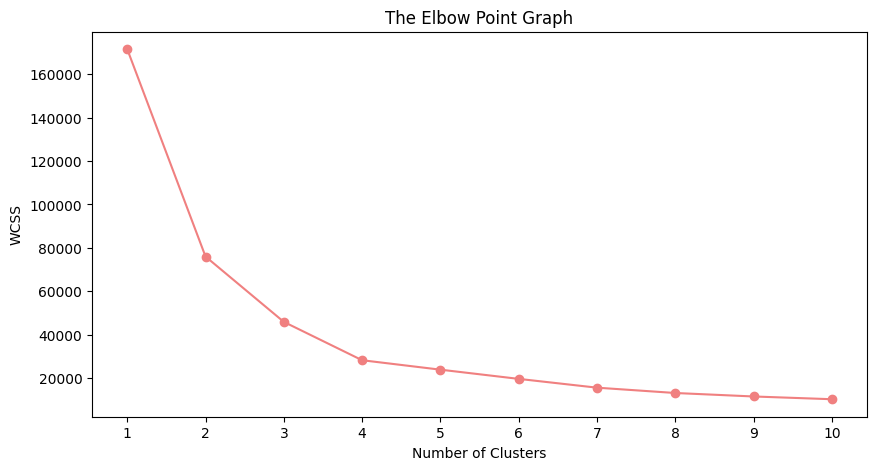

In [48]:
# plot an elbow graph
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss, color='lightcoral', marker='o')
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks(np.arange(1,11,1))
plt.show()

Optimum Number of Clusters = 4

In [49]:
kmeans = KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 0  , algorithm='elkan') 

# return a label for each data point base on their cluster
y2 = kmeans.fit_predict(x2)
print(y2)

[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


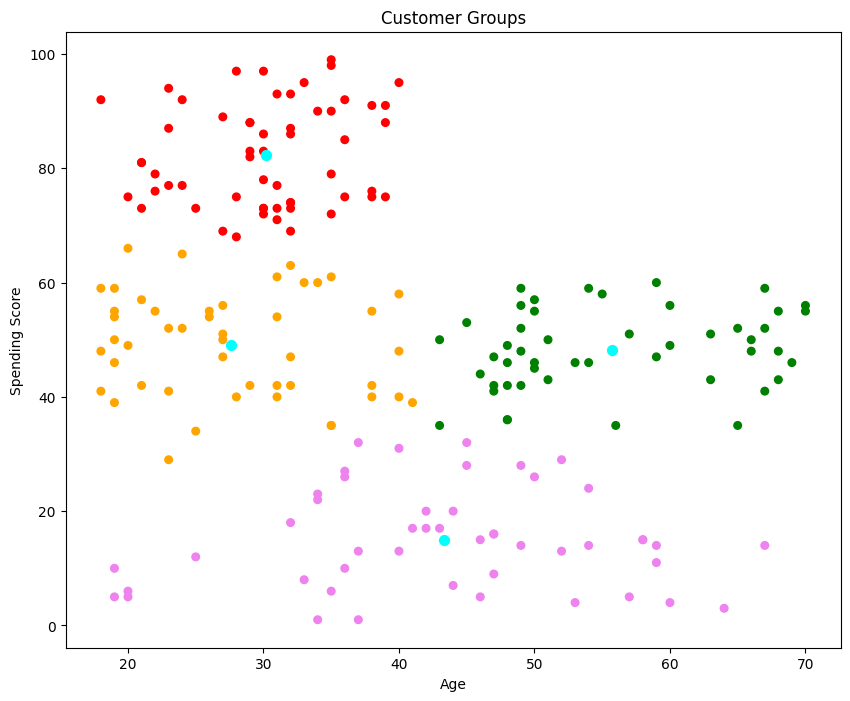

In [50]:
plt.figure(figsize=(10,8))
plt.scatter(x2[:,0], x2[:,1], c=y2, s=30, cmap=cmap)
# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='cyan', s=50)
plt.title('Customer Groups')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

Segmentation using Age , Annual Income and Spending Score

In [51]:
x3 = customer_data[['Age' , 'Annual_Income' ,'Spending_Score']]
wcss = []
for i in range(1 , 11):
    kmeans = (KMeans(n_clusters = i ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)

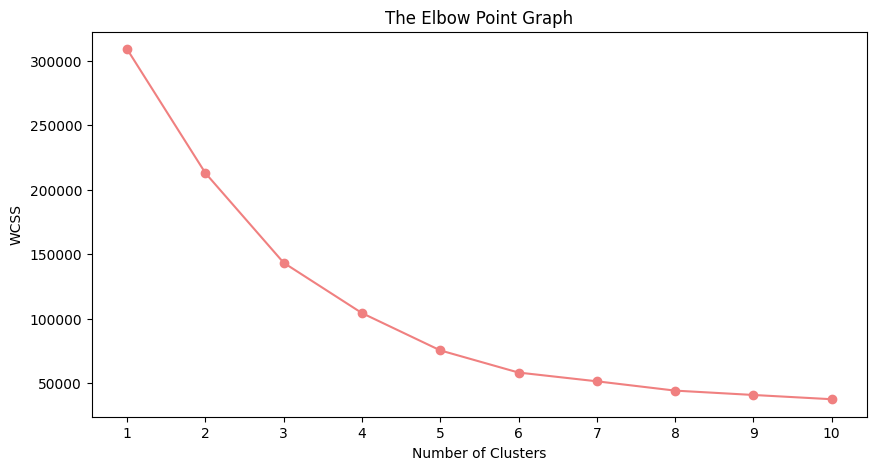

In [52]:
# plot an elbow graph
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss, color='lightcoral', marker='o')
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks(np.arange(1,11,1))
plt.show()

Optimum Number of Clusters = 4

In [53]:
kmeans = KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 0  , algorithm='elkan') 

# return a label for each data point base on their cluster
y3 = kmeans.fit_predict(x3)
print(y3)

[3 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 3 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


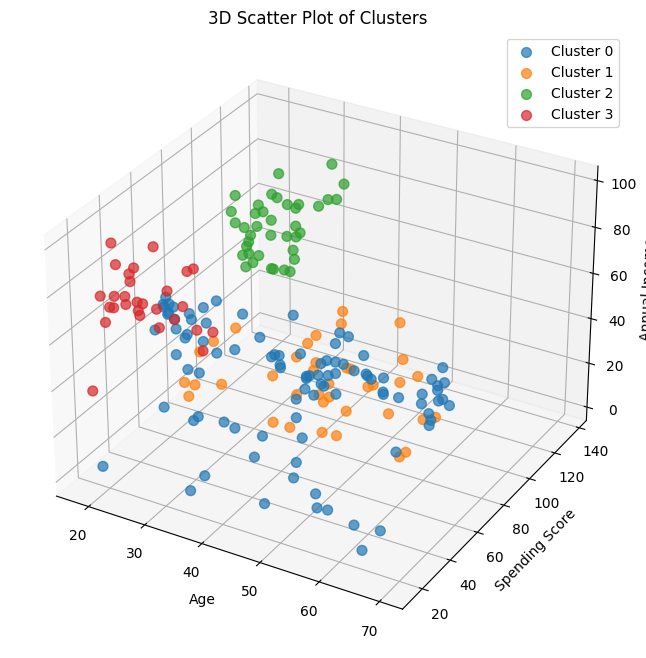

In [54]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in np.unique(y3):
    cluster_data = x3[y3 == cluster]
    ax.scatter(
        cluster_data.iloc[:, 0],  
        cluster_data.iloc[:, 1], 
        cluster_data.iloc[:, 2],  
        label=f'Cluster {cluster}',
        s=50, alpha=0.7
    )
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Annual Income')
plt.title('3D Scatter Plot of Clusters')
plt.legend()
plt.show()